In [2]:
%pylab inline
from scipy.io import wavfile
from scipy.signal import butter, lfilter, freqz,firwin
import numpy as np
from IPython.lib.display import Audio

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
# define contants
fs = 44100.0 # Sampling rate used in computer, Hz
fs_high = 44100*10 # high sampling rate 
T = 0.1
nyq_rate = fs/2
time_display = 1 #ms 


# Utilities function 
def sampling(test_signal):
    # downsampling function by factor of 10 
    signal_sampled = test_signal[::10]
    return signal_sampled

def create_sinusoid(f,fs=fs_high,T=T):
    # create sinusoid function of given frequency and time duration 
    t = np.linspace(0,T,int(T*fs)) 
    test_signal = cos(2*pi*f*t)*0.2
    return test_signal

def create_square(f,fs=fs_high,T=T):
    # create square function of given frequency and time duration 
    t = np.linspace(0, T, int(T*fs), endpoint=False)
    x = cos(2*pi*f*t)*0.2
    test_signal=sign(x)    
    return test_signal

def create_AM(f_c=13000,f_m=880,fs=fs_high,T=T):
    # create AM signal of given carrier frequency f_c and time duration, assuming message is sine with frequency of f_m 
    t = linspace(0, T, int(T*fs), endpoint=False)
    test_signal = sin(2*pi * f_c * t)*(sin(2*pi * f_m * t)+2)
    return test_signal

def create_bandpass_filter(fc_low,fc_high):
    # create bandpass filter at given cutoff frequencies, the order is default to be 127
    cutoff_hz = array([fc_low,fc_high])
    n = 127
    taps = firwin(n,cutoff_hz/nyq_rate,pass_zero=False)
    return taps


def low_pass_filter(cut_off):
    # return impulse response of a low pass filter with given cut off frequency
    fc_low = cut_off
    cutoff_hz = array([fc_low])
    n = 127
    taps_lpf = firwin(n,cutoff_hz/nyq_rate)
    return taps_lpf

def Envelope_Detector(f):
    # return output of an envelope dector with given input
    f_abs = abs(f)
    cut_off = 4e3
    taps_lpf = low_pass_filter(cut_off)
    y_envelope = convolve(f_abs,taps_lpf)
    return y_envelope

def Coherent_Detector(f):
    # return output of an envelope dector with given input
    L = len(f)
    t = linspace(0,L/fs,L)
    fft_len = 2**16
    
    if L > fft_len:
        f_fft = abs(fft.fft(f,fft_len))
        carrier_freq = argmax(f_fft[:int(fft_len/2)])/fft_len*fs
    else :
        
        f_fft = abs(fft.fft(f,L))
        carrier_freq = argmax(f_fft[:int(L/2)])/L*fs
    f_demod = f*sin(carrier_freq*2*pi*t)
    cut_off = 4e3
    taps_lpf = low_pass_filter(cut_off)
    y_coherent = convolve(f_demod,taps_lpf)
    return y_coherent


#Display auxiliary function 
def freq_response(impulse_response):
    # show frequency response of given impulse response
    w, h = freqz(impulse_response, worN=8000)
    plot((w/pi)*nyq_rate/1000, (abs(h)), linewidth=2)
    xlabel("Frequency / kHz")
    ylabel("Magnitude / rms")
    title("Filter frequency response")    
    
    
def time_domain_display_stem(test_signal):
    # create stem for given time display interval, assuming low sampling rate
    test_signal = roll(test_signal,200)
    npts_display = round(time_display*fs/1000)    
    t_axis = linspace(0,time_display,npts_display)
    stem(t_axis,test_signal[:npts_display])
    xlabel("Time / ms")
    ylabel("Amplitude")
    
def time_domain_display_plot(test_signal):
    # create plot for given time display interval, assuming high sampling rate
    test_signal = roll(test_signal,2000)
    npts_display = round(time_display*fs_high/1000)    
    t_axis = linspace(0,time_display,npts_display)
    plot(t_axis,test_signal[:npts_display])
    xlabel("Time / ms")
    ylabel("Amplitude")
    
def freq_domain_display(test_signal,unit="rms"):
    # create Fourier transform spectrum for positive frequency, assuming low sampling rate
    npts_display = int(len(test_signal)/2)
    
    if npts_display  >2**15:
        npts_display = 2**15
    

    y_fft = fft.fft(test_signal,npts_display*2)
    
    freq_display = fs/2/1000
    freq_axis = linspace(0,freq_display,npts_display)
    if unit == "rms":
        plot(freq_axis,abs(y_fft)[:npts_display])
        ylabel("Magnitude / rms")
    else :
        plot(freq_axis,20*log10(abs(y_fft)[:npts_display]))
        ylabel("Magnitude / dB")
    xlabel("Frequency / kHz")
    title("Magnitude vs Frequency (kHz)")

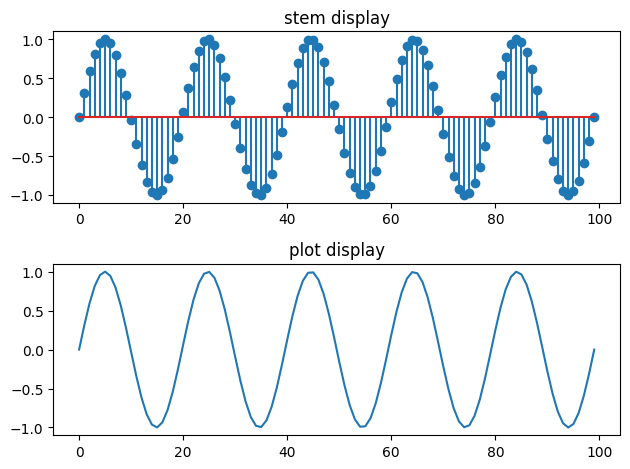

In [4]:
t = linspace(0,1,100)
f_t = sin(2*pi*t*5)
subplot(2,1,1)
stem(f_t)
title("stem display")
subplot(2,1,2)
plot(f_t)
title("plot display")
tight_layout()

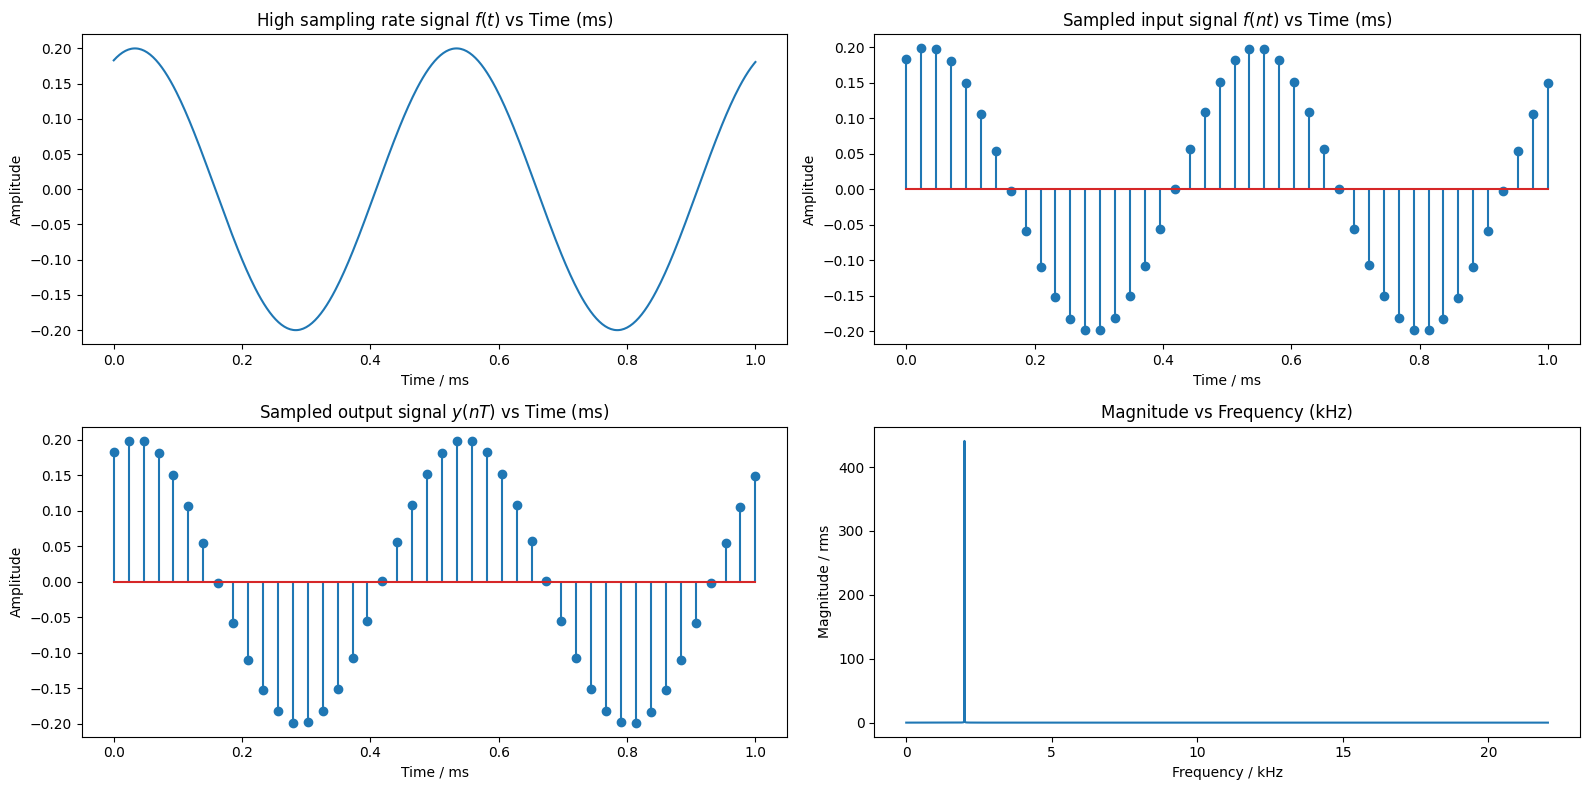

In [5]:
f =    2000# Hz, fill the number 2000 here and excute this cell 
f_t = create_sinusoid(f,fs_high)
f_nT = sampling(f_t)
y_nT = f_nT
figure(figsize=(16,8))
subplot(2,2,1)
time_domain_display_plot(f_t)
title("High sampling rate signal $f(t)$ vs Time (ms)")
subplot(2,2,2)
time_domain_display_stem(f_nT)
title("Sampled input signal $f(nt)$ vs Time (ms)")
subplot(2,2,3)
time_domain_display_stem(y_nT)
title("Sampled output signal $y(nT)$ vs Time (ms)")
subplot(2,2,4) 
freq_domain_display(f_nT)
tight_layout()

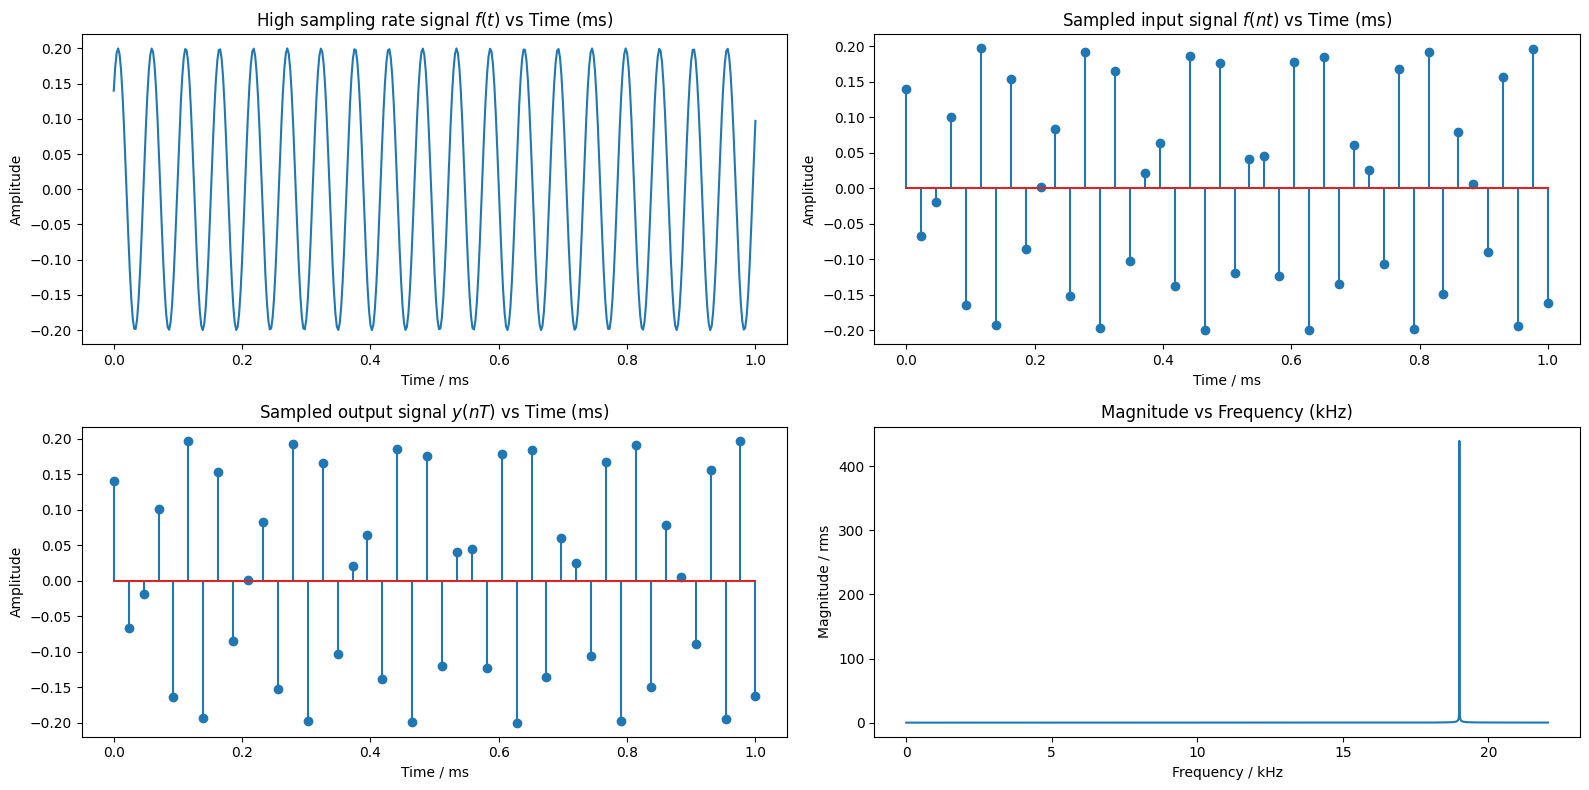

In [6]:
f =  19000# Hz 
f_t = create_sinusoid(f,fs_high)
f_nT = sampling(f_t)
y_nT = f_nT
figure(figsize=(16,8))
subplot(2,2,1)
time_domain_display_plot(f_t)
title("High sampling rate signal $f(t)$ vs Time (ms)")
subplot(2,2,2)
time_domain_display_stem(f_nT)
title("Sampled input signal $f(nt)$ vs Time (ms)")
subplot(2,2,3)
time_domain_display_stem(y_nT)
title("Sampled output signal $y(nT)$ vs Time (ms)")
subplot(2,2,4) 
freq_domain_display(f_nT)
tight_layout()

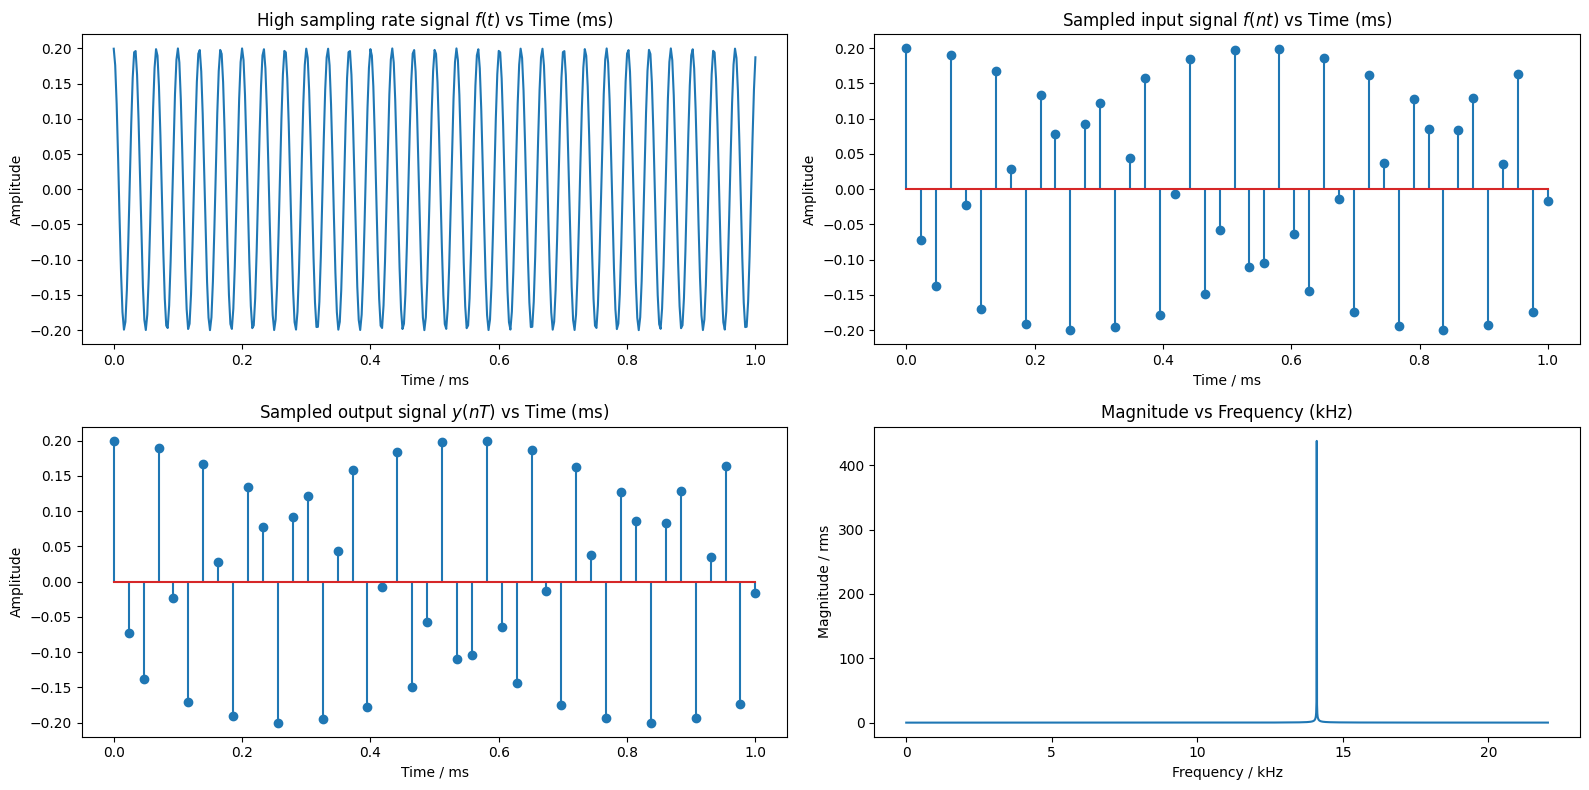

In [7]:
f =   30000# Hz 
f_t = create_sinusoid(f,fs_high)
f_nT = sampling(f_t)
y_nT = f_nT
figure(figsize=(16,8))
subplot(2,2,1)
time_domain_display_plot(f_t)
title("High sampling rate signal $f(t)$ vs Time (ms)")
subplot(2,2,2)
time_domain_display_stem(f_nT)
title("Sampled input signal $f(nt)$ vs Time (ms)")
subplot(2,2,3)
time_domain_display_stem(y_nT)
title("Sampled output signal $y(nT)$ vs Time (ms)")
subplot(2,2,4) 
freq_domain_display(f_nT)
tight_layout()

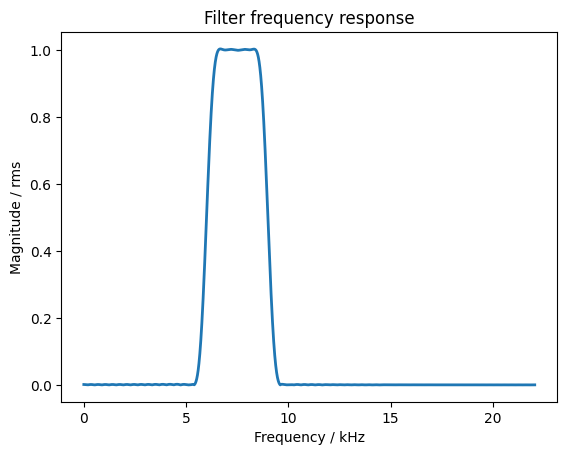

In [8]:
fc_low = 6*1000 
fc_high = 9*1000 
taps = create_bandpass_filter(fc_low,fc_high)
freq_response(taps)

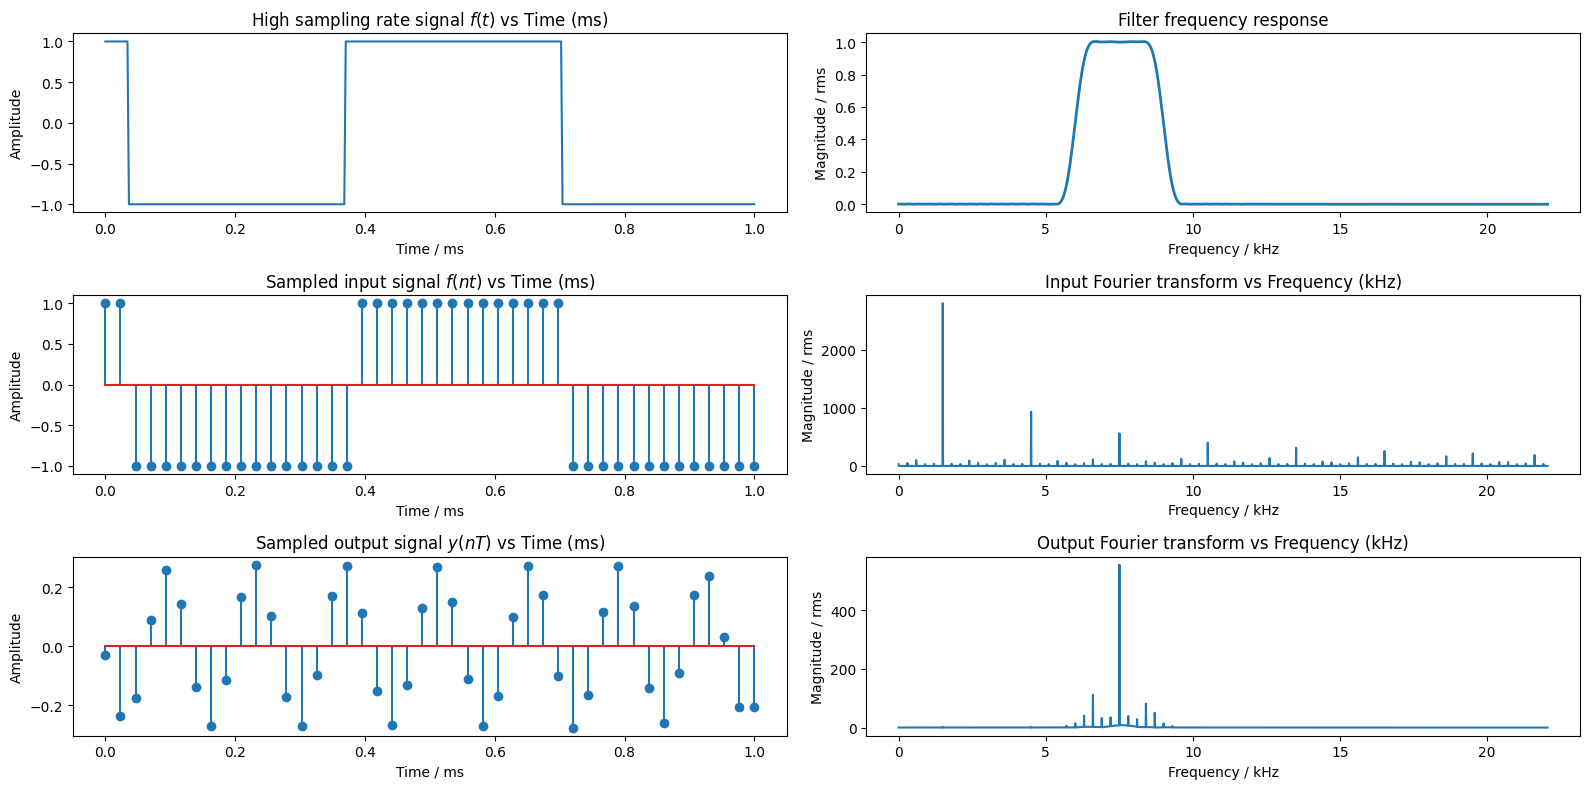

In [9]:
f =1500  # Hz,
f_t = create_square(f,fs_high)
f_nT = sampling(f_t)
y_nT = lfilter(taps,1,f_nT)
figure(figsize=(16,8))
subplot(3,2,1)
time_domain_display_plot(f_t)
title("High sampling rate signal $f(t)$ vs Time (ms)")
subplot(3,2,2)
freq_response(taps)
subplot(3,2,3)
time_domain_display_stem(f_nT)
title("Sampled input signal $f(nt)$ vs Time (ms)")
subplot(3,2,4) 
freq_domain_display(f_nT)
title("Input Fourier transform vs Frequency (kHz)")
subplot(3,2,5)
time_domain_display_stem(y_nT)
title("Sampled output signal $y(nT)$ vs Time (ms)")
subplot(3,2,6) 
freq_domain_display(y_nT)
title("Output Fourier transform vs Frequency (kHz)")
tight_layout()

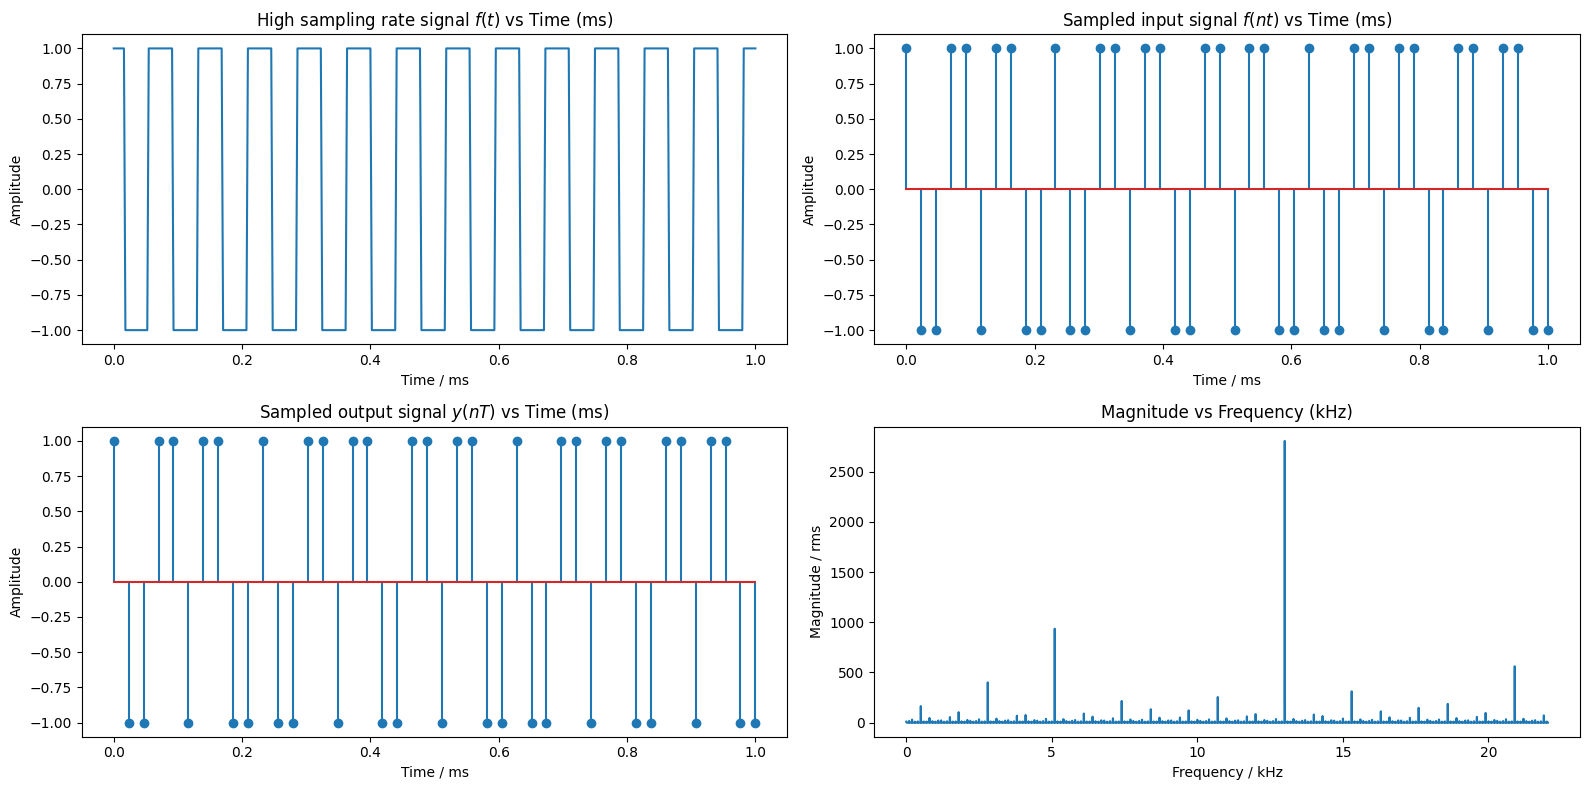

In [10]:
f = 13000 # Hz
f_t = create_square(f,fs_high)
f_nT = sampling(f_t)
y_nT = f_nT
figure(figsize=(16,8))

subplot(2,2,1)
time_domain_display_plot(f_t)
title("High sampling rate signal $f(t)$ vs Time (ms)")
subplot(2,2,2)
time_domain_display_stem(f_nT)
title("Sampled input signal $f(nt)$ vs Time (ms)")
subplot(2,2,3)
time_domain_display_stem(y_nT)
title("Sampled output signal $y(nT)$ vs Time (ms)")
subplot(2,2,4) 
freq_domain_display(f_nT)

tight_layout()

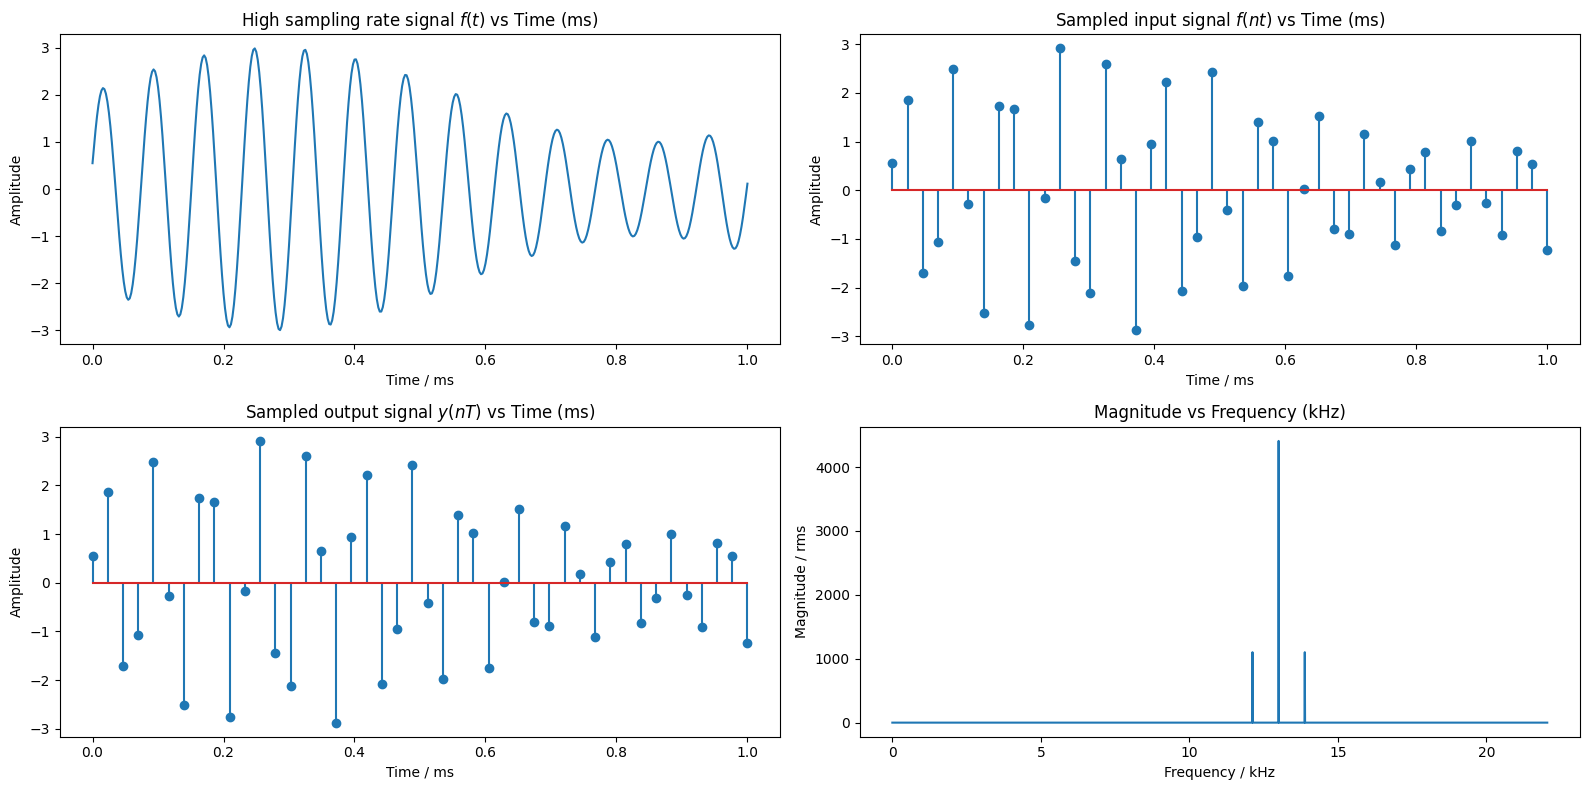

In [11]:
f_c = 13000 # Hz
f_m = 880
f_t = create_AM(f_c,f_m)
f_nT = sampling(f_t)
y_nT = f_nT
figure(figsize=(16,8))
subplot(2,2,1)
time_domain_display_plot(f_t)
title("High sampling rate signal $f(t)$ vs Time (ms)")
subplot(2,2,2)
time_domain_display_stem(f_nT)
title("Sampled input signal $f(nt)$ vs Time (ms)")
subplot(2,2,3)
time_domain_display_stem(y_nT)
title("Sampled output signal $y(nT)$ vs Time (ms)")
subplot(2,2,4) 
freq_domain_display(f_nT)
tight_layout()

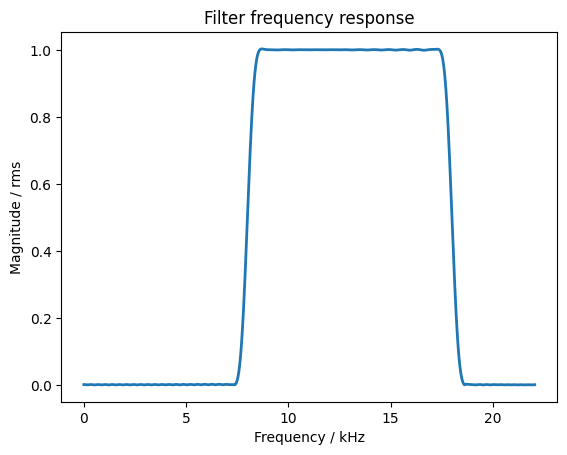

In [13]:
fc_low = 8*1000 
fc_high = 18*1000 
taps = create_bandpass_filter(fc_low,fc_high)
freq_response(taps)


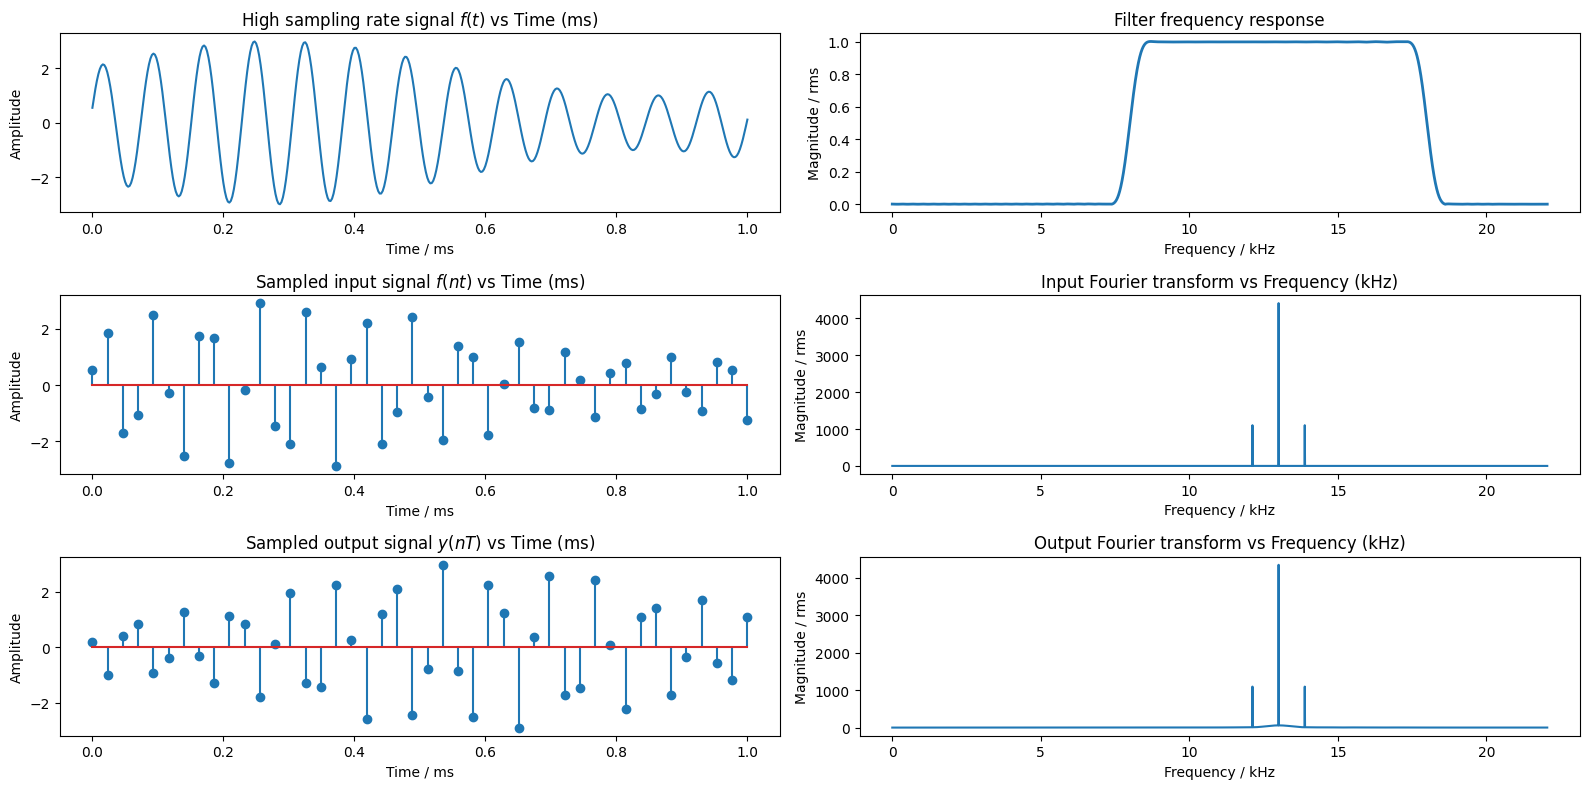

In [14]:
f_nT = sampling(f_t)
y_nT = lfilter(taps,1,f_nT)
figure(figsize=(16,8))
subplot(3,2,1)
time_domain_display_plot(f_t)
title("High sampling rate signal $f(t)$ vs Time (ms)")
subplot(3,2,2)
freq_response(taps)
subplot(3,2,3)
time_domain_display_stem(f_nT)
title("Sampled input signal $f(nt)$ vs Time (ms)")
subplot(3,2,4) 
freq_domain_display(f_nT)
title("Input Fourier transform vs Frequency (kHz)")
subplot(3,2,5)
time_domain_display_stem(y_nT)
title("Sampled output signal $y(nT)$ vs Time (ms)")
subplot(3,2,6) 
freq_domain_display(y_nT)
title("Output Fourier transform vs Frequency (kHz)")
tight_layout()

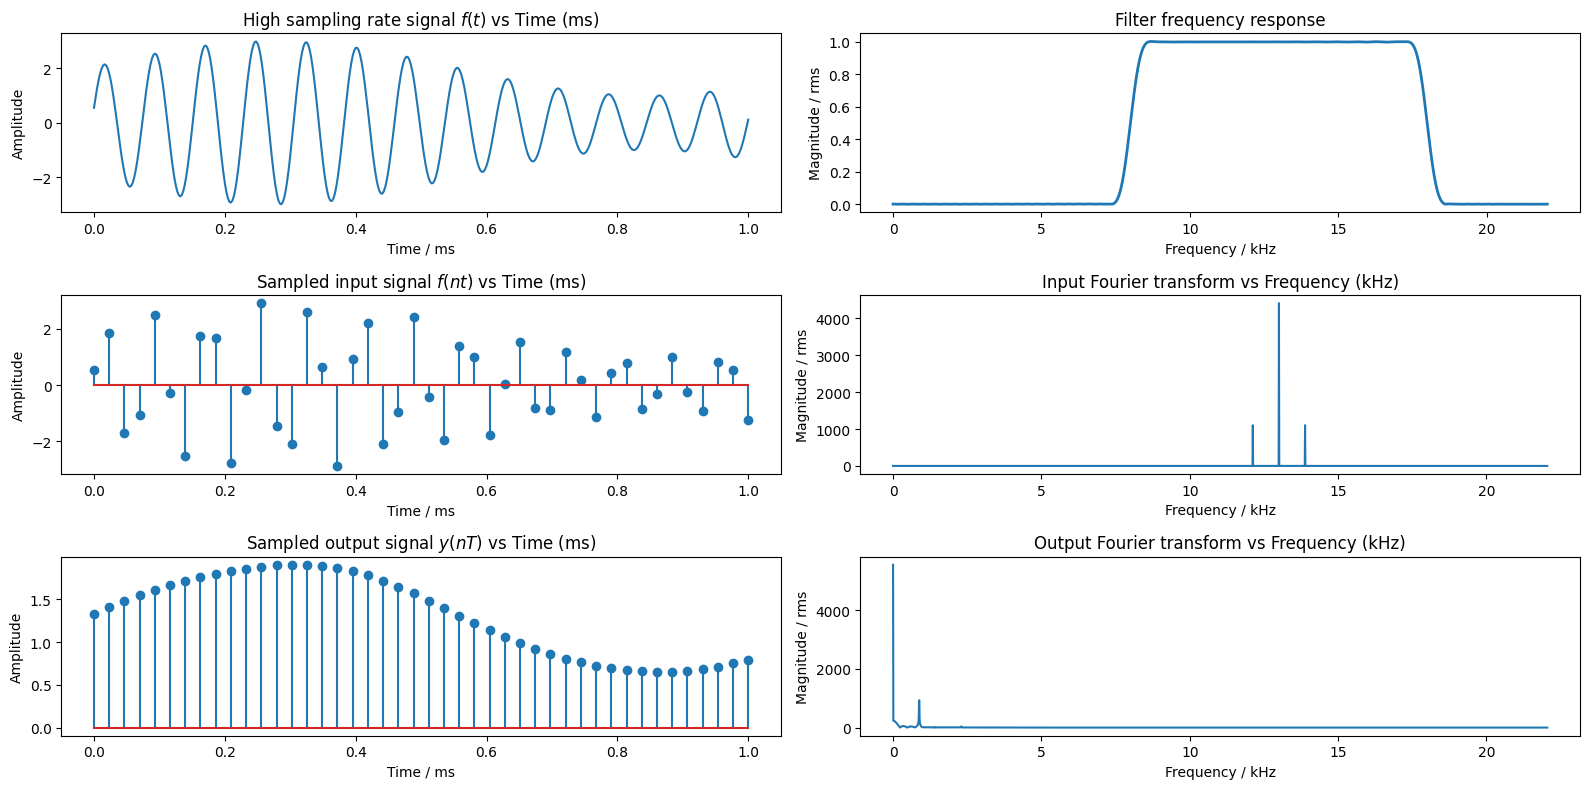

In [15]:
f_nT = sampling(f_t)
filtered_signal = lfilter(taps,1,f_nT)
y_nT = Envelope_Detector(filtered_signal)

figure(figsize=(16,8))
subplot(3,2,1)
time_domain_display_plot(f_t)
title("High sampling rate signal $f(t)$ vs Time (ms)")
subplot(3,2,2)
freq_response(taps)
subplot(3,2,3)
time_domain_display_stem(f_nT)
title("Sampled input signal $f(nt)$ vs Time (ms)")
subplot(3,2,4) 
freq_domain_display(f_nT)
title("Input Fourier transform vs Frequency (kHz)")
subplot(3,2,5)
time_domain_display_stem(y_nT)
title("Sampled output signal $y(nT)$ vs Time (ms)")
subplot(3,2,6) 
freq_domain_display(y_nT)
title("Output Fourier transform vs Frequency (kHz)")
tight_layout()

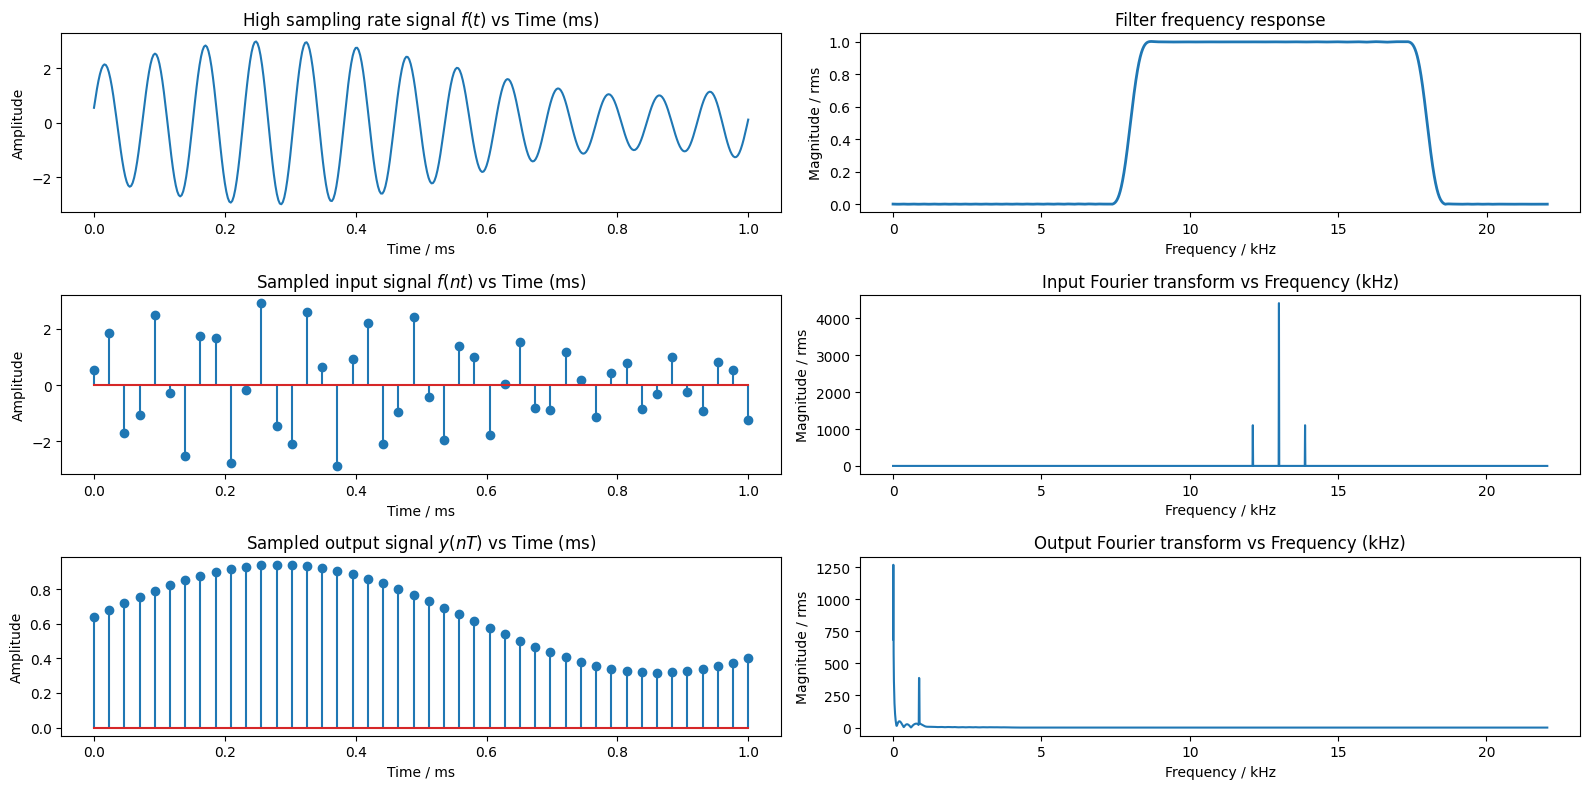

In [16]:
f_nT = sampling(f_t)
filtered_signal = lfilter(taps,1,f_nT)
y_nT = Coherent_Detector(filtered_signal)

figure(figsize=(16,8))
subplot(3,2,1)
time_domain_display_plot(f_t)
title("High sampling rate signal $f(t)$ vs Time (ms)")
subplot(3,2,2)
freq_response(taps)
subplot(3,2,3)
time_domain_display_stem(f_nT)
title("Sampled input signal $f(nt)$ vs Time (ms)")
subplot(3,2,4) 
freq_domain_display(f_nT)
title("Input Fourier transform vs Frequency (kHz)")
subplot(3,2,5)
time_domain_display_stem(y_nT)
title("Sampled output signal $y(nT)$ vs Time (ms)")
subplot(3,2,6) 
freq_domain_display(y_nT)
title("Output Fourier transform vs Frequency (kHz)")
tight_layout()

In [20]:
file_name = 'TP1_recorded_2.wav' # other options are available 
fs, wave_test = wavfile.read(file_name)
audio_signal = wave_test/2**16
fc_low = 10*1000 
fc_high = 18*1000 
taps = create_bandpass_filter(fc_low,fc_high)
Audio(audio_signal, rate=fs)

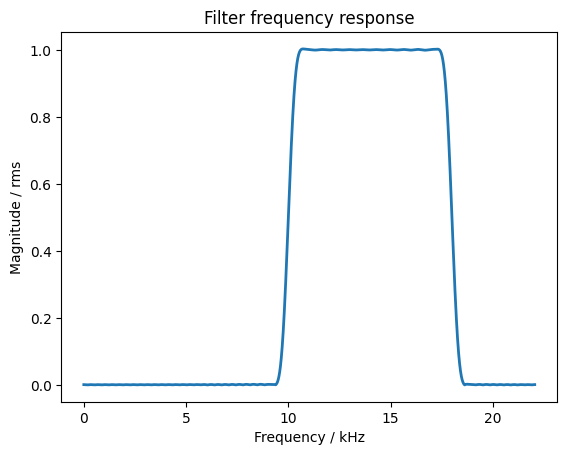

In [21]:
freq_response(taps)

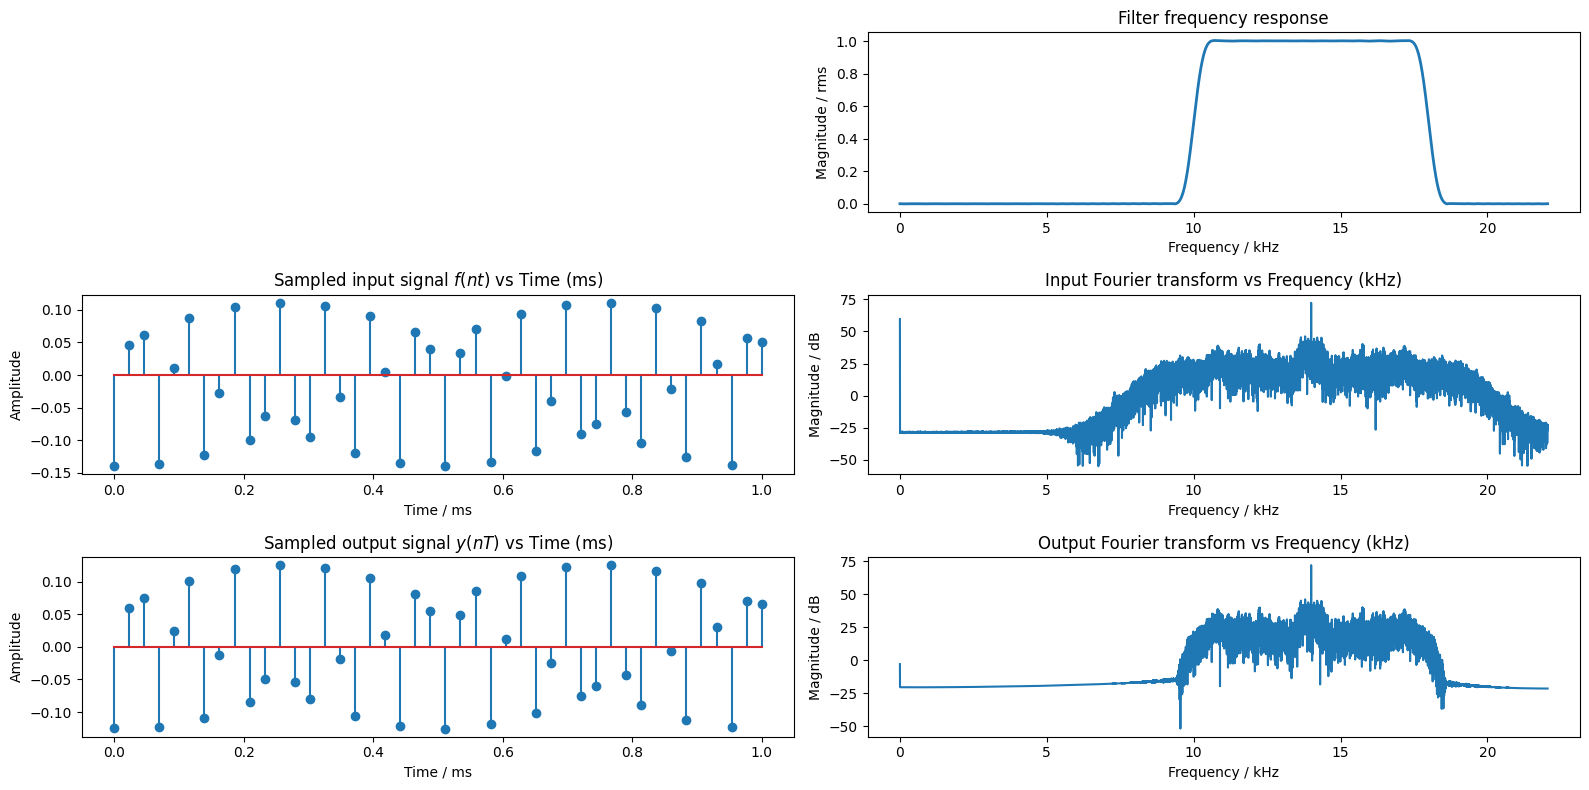

In [22]:
f_nT = audio_signal
filtered_signal = lfilter(taps,1,f_nT)
y_nT = filtered_signal
figure(figsize=(16,8))
subplot(3,2,2)
freq_response(taps)
subplot(3,2,3)
time_domain_display_stem(f_nT)
title("Sampled input signal $f(nt)$ vs Time (ms)")
subplot(3,2,4) 
freq_domain_display(f_nT,unit="dB")
title("Input Fourier transform vs Frequency (kHz)")
subplot(3,2,5)
time_domain_display_stem(y_nT)
title("Sampled output signal $y(nT)$ vs Time (ms)")
subplot(3,2,6) 
freq_domain_display(y_nT,unit="dB")
title("Output Fourier transform vs Frequency (kHz)")
tight_layout()

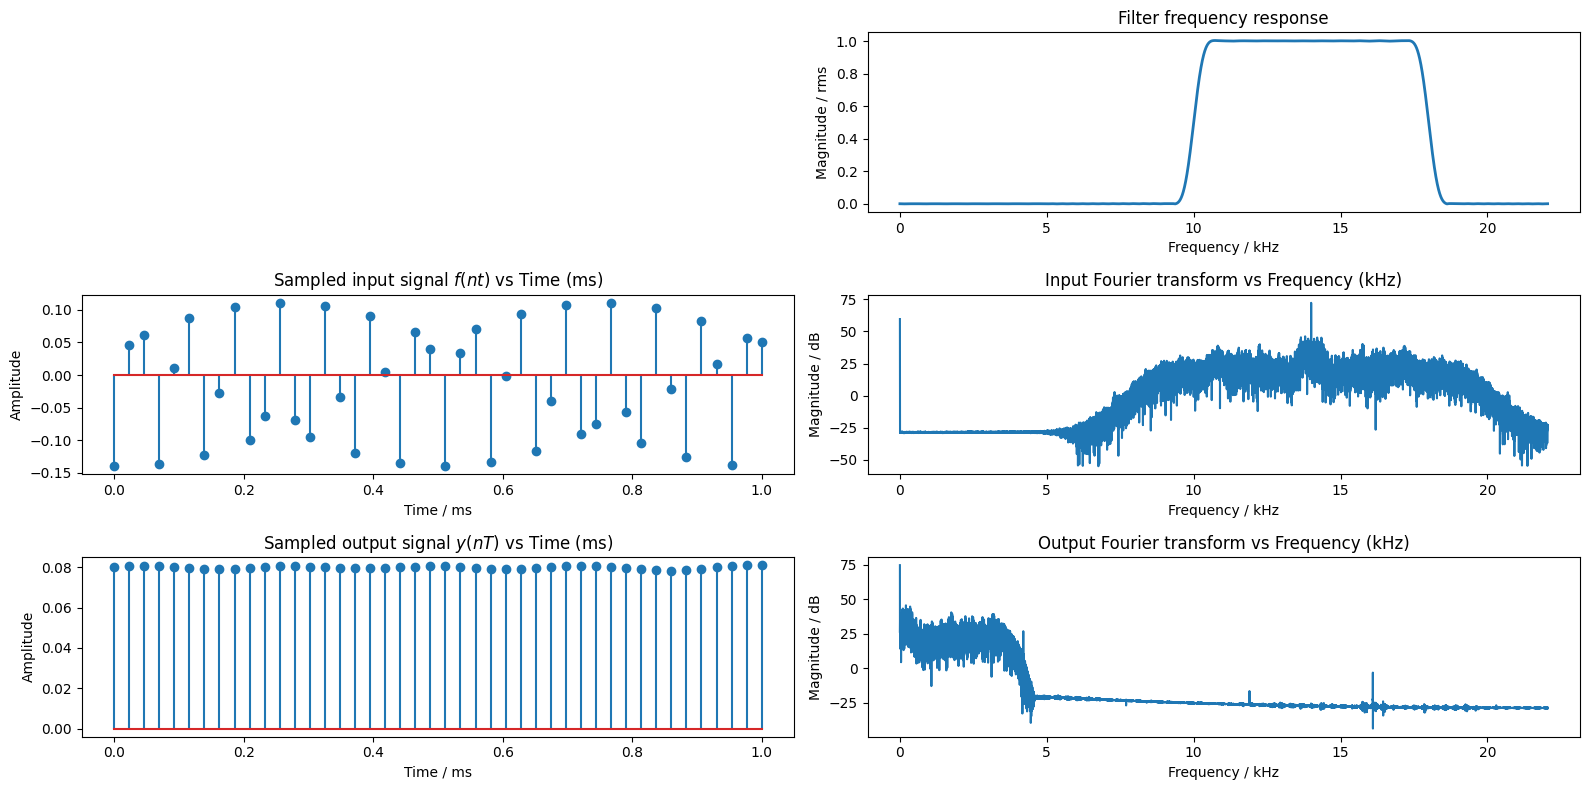

In [23]:
f_nT = audio_signal
filtered_signal = lfilter(taps,1,f_nT)
y_nT = Envelope_Detector(filtered_signal)
figure(figsize=(16,8))
subplot(3,2,2)
freq_response(taps)
subplot(3,2,3)
time_domain_display_stem(f_nT)
title("Sampled input signal $f(nt)$ vs Time (ms)")
subplot(3,2,4) 
freq_domain_display(f_nT,unit="dB")
title("Input Fourier transform vs Frequency (kHz)")
subplot(3,2,5)
time_domain_display_stem(y_nT)
title("Sampled output signal $y(nT)$ vs Time (ms)")
subplot(3,2,6) 
freq_domain_display(y_nT,unit="dB")
title("Output Fourier transform vs Frequency (kHz)")
tight_layout()

In [24]:
Audio(y_nT, rate = fs)